<a href="https://colab.research.google.com/github/jigyasavats/EXPLORATORY-DATA-ANALYSIS/blob/master/EXPLORATORY_DATA_ANALYSIS_OF_CAR_FEATURES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROJECT BY JIGYASA......... 

## EXPLORATORY DATA ANALYSIS

**What is Exploratory Data Analysis (EDA) ?**

EDA is a phenomenon under data analysis used for gaining a better understanding of data aspects like:

– main features of data

– variables and relationships that hold between them

– identifying which variables are important for our problem



We shall look at various **exploratory data analysis methods** like:

    Descriptive Statistics, which is a way of giving a brief overview of the dataset we are dealing with, including some measures and features of the sample
    Grouping data [Basic grouping with group by]
    ANOVA, Analysis Of Variance, which is a computational method to divide variations in an observations set into different components.
    Correlation and correlation methods *italicized text*


#STEP -1 


**Import libraries**

In [20]:
import pandas 
from pandas.plotting import scatter_matrix 
import matplotlib.pyplot as plt 
from sklearn import model_selection 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC 

**Load The Data.**

Data can directly be loaded the UCI Machine Learning repository.
Using pandas to load the data **and** exploring descriptive statistics and data visualization.

In [21]:
#loading 
data=pd.read_csv('data.csv')
data

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [22]:
#gettting number of columns and rows of data
data.shape

(11914, 16)

In [23]:
#getting top 5 data from given dataset
data.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [24]:
#getting bottom 5 data from entire dataset
data.tail(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


**Summarize the Dataset**


    Dimensions of the dataset.
    Peek at the data itself.
    Statistical summary of all attributes.
    Breakdown of the data by the class variable.


**Statistical Summary**
This includes the count, mean, the min and max values as well as some percentiles.

In [25]:
#details about the data
data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [26]:
#getting more information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

# STEP 2

**Dropping irrelevant columns**

This step is usefule sometimes there would be columns that we never use and in such cases dropping is preferred

In [27]:
data = data.drop(['Engine Fuel Type', 'Number of Doors','Market Category'], axis=1)
data.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


# STEP 3

**Renaming the columns**

As per our requirement we can rename the columns and  it improves the readability of the data. 

In [28]:
#renaming columns by using rename function
data= data.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "TransmissionType": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "citympg": "MPG-C", "MSRP": "Price"})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   HP                 11845 non-null  float64
 4   Cylinders          11884 non-null  float64
 5   Transmission Type  11914 non-null  object 
 6   Drive Mode         11914 non-null  object 
 7   Vehicle Size       11914 non-null  object 
 8   Vehicle Style      11914 non-null  object 
 9   MPG-H              11914 non-null  int64  
 10  city mpg           11914 non-null  int64  
 11  Popularity         11914 non-null  int64  
 12  Price              11914 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.2+ MB


# STEP 4

**Dropping the duplicate rows**

Duplicate data is kind of like the flip side of missing data. Having too much of the same data would not help your model. It is also more computationally costly to process, and may give the duplicate data more weight in your models than it should have

In [29]:
data.shape

(11914, 13)

So it’s a good practice to check for duplicate data as a routine.

The following function computes the number of duplicate rows in a pandas DataFrame

In [30]:
number = data[data.duplicated()]
print("TOTAL NUMBER OF DUPLICATE ROWS IN OUR DATASET : ", number.shape)

TOTAL NUMBER OF DUPLICATE ROWS IN OUR DATASET :  (792, 13)


In [32]:
data = data.drop_duplicates()
data.head(10)

,Make,Model,Year,HP,Cylinders,Transmission Type,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,city mpg,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500
5,BMW,1 Series,2012,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,31200
6,BMW,1 Series,2012,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,26,17,3916,44100
7,BMW,1 Series,2012,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,39300
8,BMW,1 Series,2012,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,36900
9,BMW,1 Series,2013,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,27,18,3916,37200


In [33]:
data.shape

(11122, 13)

hence after dropping we can see number of rows are decresed

**Dropping the null values** 


Missing data directly affects what you need to do in the downstream step — data cleaning, therefore checking for missing data should be a routine during EDA. I’ve written the following function, which prints out the number and percentage of null values in each column of a pandas DataFrame

In [37]:
data.isnull().sum()


Make                  0
Model                 0
Year                  0
HP                   69
Cylinders            30
Transmission Type     0
Drive Mode            0
Vehicle Size          0
Vehicle Style         0
MPG-H                 0
city mpg              0
Popularity            0
Price                 0
dtype: int64

 percentage of null values in each column

In [42]:
(data.isnull().sum() / len(data))*100

Make                 0.000000
Model                0.000000
Year                 0.000000
HP                   0.620392
Cylinders            0.269736
Transmission Type    0.000000
Drive Mode           0.000000
Vehicle Size         0.000000
Vehicle Style        0.000000
MPG-H                0.000000
city mpg             0.000000
Popularity           0.000000
Price                0.000000
dtype: float64

We can see that HP and CYLINDER have missing values in it


In [43]:
data = data.dropna()    # function used to drop the missing value
data.count() #again counting

Make                 11024
Model                11024
Year                 11024
HP                   11024
Cylinders            11024
Transmission Type    11024
Drive Mode           11024
Vehicle Size         11024
Vehicle Style        11024
MPG-H                11024
city mpg             11024
Popularity           11024
Price                11024
dtype: int64

After Dropping the missing value column we can see that there is no missing value are present in data

In [45]:
data.isnull().sum()

Make                 0
Model                0
Year                 0
HP                   0
Cylinders            0
Transmission Type    0
Drive Mode           0
Vehicle Size         0
Vehicle Style        0
MPG-H                0
city mpg             0
Popularity           0
Price                0
dtype: int64

# STEP 5

**OUTLIERS**

Outliers and extreme values are often represented with circles and asterisks, respectively. Outliers are values that lie from 1.5 to 3 box lengths (the box length represents the interquartile range) outside the hinges. Extreme values lie more than 3 box lengths outside the hinges. In a box and whisker plot the actual values of the scores will typically lie adjacent to the outlier and extreme value symbols to facilitate examination and interpretation of the data
 Sometimes they can be very high or very low.

Shown below are the box plot of MSRP, Cylinders, Horsepower.

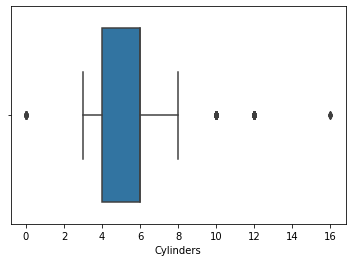

In [47]:
import seaborn as sns
sns.boxplot(x=data['Cylinders'])

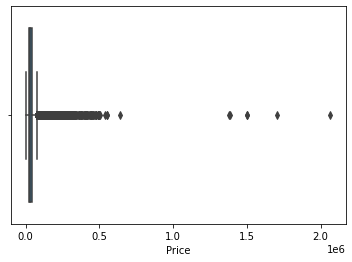

In [48]:
sns.boxplot(x=data['Price'])

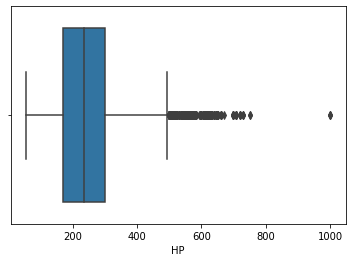

In [49]:
sns.boxplot(x=data['HP'])

**Quantile**

In simple terms, a quantile is where a sample is divided into equal-sized, adjacent, subgroups (that's why it's sometimes called a “fractile“). ... The median is a quantile; the median is placed in a probability distribution so that exactly half of the data is lower than the median and half of the data is above the median

In [50]:
q1 = data.quantile(0.25)


In [51]:
q3 = data.quantile(0.75)
IQR = q3 - q1
print(IQR)

Year              9.00
HP              131.00
Cylinders         2.00
MPG-H             8.00
city mpg          6.00
Popularity     1460.00
Price         21426.25
dtype: float64


In [52]:
data = data[~((data < (q1 - 1.5 * IQR)) |(data > (q3 + 1.5 * IQR))).any(axis=1)]
data.shape

(8546, 13)

# STEP 6

**most represented car brands**

While the Indian car industry has been gripped by a sales slowdown for many months now, there’s no denying the continued growth in terms of new car launches and ever-expanding sales networks of the carmakers. In fact, even after a dip in performance, the local car market continues to be one of the fastest-growing markets in the world

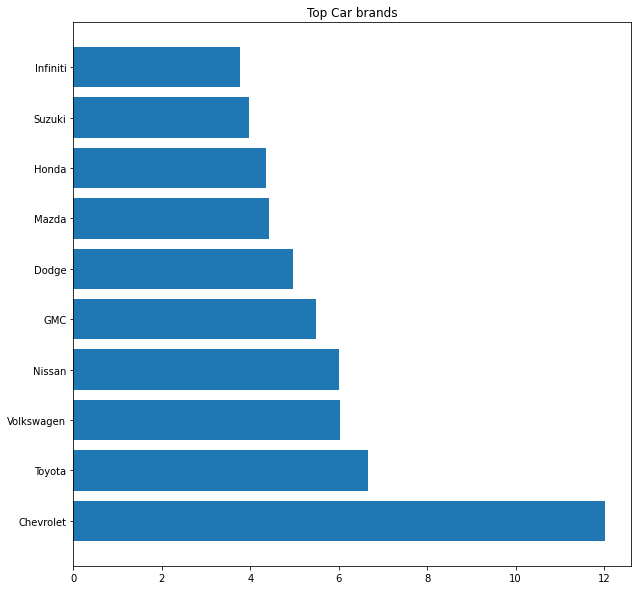

In [60]:

counts = data['Make'].value_counts()*100/sum(data['Make'].value_counts())
popular_labels = counts.index[:10]   #top car brands
plt.figure(figsize=(10,10))
plt.barh(popular_labels, width=counts[:10])
plt.title('Top Car brands')
plt.show()

from above graph we can ses the top car brands

In [59]:
prices_of_the_car = data[['Make','Price']].loc[(data['Make'] == 'Chevrolet')|
               (data['Make'] == 'Ford')|
               (data['Make'] == 'Volkswagen')|
               (data['Make'] == 'Toyota')|
               (data['Make'] == 'Dodge')|
               (data['Make'] == 'Nissan')|
               (data['Make'] == 'GMC')|
               (data['Make'] == 'Honda')|
               (data['Make'] == 'Mazda')].groupby('Make').mean()
print(prices_of_the_car)

                   Price
Make                    
Chevrolet   28142.855891
Dodge       26076.722353
GMC         33261.400853
Honda       27381.364611
Mazda       20495.820106
Nissan      28352.543860
Toyota      27769.421793
Volkswagen  29032.817476


# STEP 7

**Correlation matrix**

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses

In [61]:
data.corr()

,Year,HP,Cylinders,MPG-H,city mpg,Popularity,Price
Year,1.000000,0.325104,-0.106597,0.373319,0.335236,0.200710,0.591439
HP,0.325104,1.000000,0.734094,-0.453451,-0.554768,0.095161,0.745852
Cylinders,-0.106597,0.734094,1.000000,-0.691395,-0.746361,0.013373,0.389049
MPG-H,0.373319,-0.453451,-0.691395,1.000000,0.936978,0.093002,-0.121262
city mpg,0.335236,-0.554768,-0.746361,0.936978,1.000000,0.081110,-0.197330
Popularity,0.200710,0.095161,0.013373,0.093002,0.081110,1.000000,0.113604
Price,0.591439,0.745852,0.389049,-0.121262,-0.197330,0.113604,1.000000


By analysing above table we can conclude **High correlation between**(Cylinders & HP and highway mpg & City mpg)
**High anticorrelation**(Cylinders & highway mpg)

# STEP 8

**Analysis**

By different graph we will analyze the dataframe

**Scatter plot**

scatter plot is a type of plot or mathematical diagram using Cartesian coordinates to display values for typically two variables for a set of data. If the points are coded, one additional variable can be displayed.

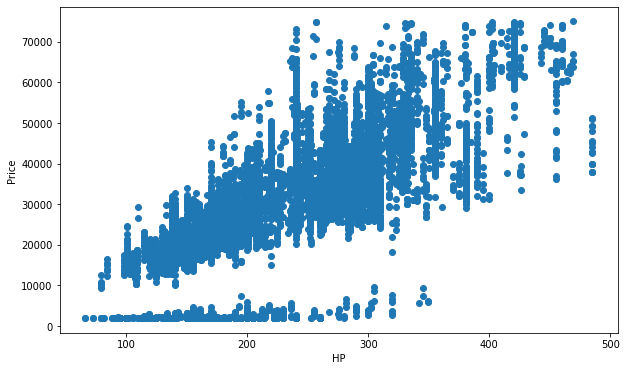

In [63]:
figure, ax = plt.subplots(figsize=(10,6))
ax.scatter(data['HP'], data['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()

**Multivariate Plots** 

Interactions between the variables.
First, let’s look at scatterplots of all pairs of attributes. This can be helpful to spot structured relationships between input variables.

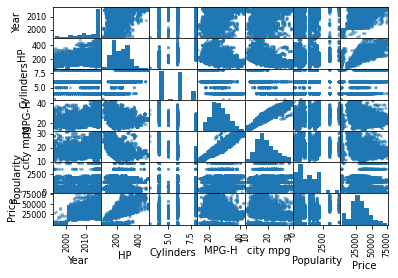

In [66]:
# scatter plot matrix 
scatter_matrix(data) 
plt.show()

**Heatmap**

A heatmap is a graphical representation where individual values of a matrix are represented as colors. A heatmap is very useful in visualizing the concentration of values between two dimensions of a matrix. This helps in finding patterns and gives a perspective of depth.

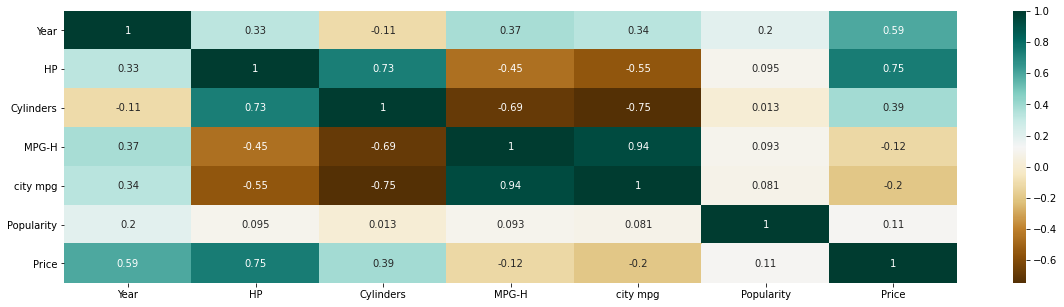

In [64]:
plt.figure(figsize=(20,5))
coi= data.corr()
sns.heatmap(coi,cmap="BrBG",annot=True)

Text(0.5, 0, 'Count of vehicles')

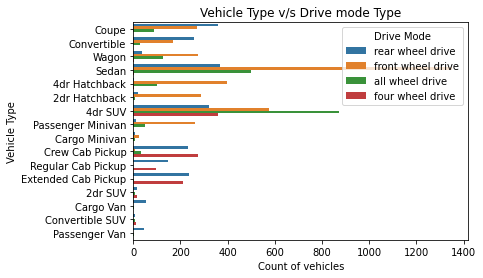

In [67]:
# Vehicle Style type and Drive type analysis
sns.countplot(y='Vehicle Style',data=data, hue='Drive Mode')
plt.title("Vehicle Type v/s Drive mode Type")
plt.ylabel('Vehicle Type')
plt.xlabel('Count of vehicles')

# STEP 9

**Split-out validation dataset**

Using statistical methods to estimate the accuracy of the models that we create on unseen data. A concrete estimate of the accuracy of the best model on unseen data is taken by evaluating it on actual unseen data.
Some data is used as testing data that the algorithms will not get to see and this data is used get a second and independent idea of how accurate the best model might actually be.

Testing data is split into two, 80% of which we will use to train our models and 20% that we will hold back as a validation dataset.

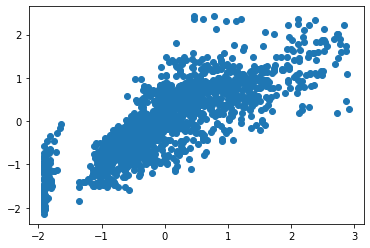

In [83]:
X = data[['Popularity', 'Year', 'HP', 'Cylinders', 'MPG-H' , 'city mpg']].values
y = data['Price'].values
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1,1))
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
plt.scatter(y_test,y_pred)

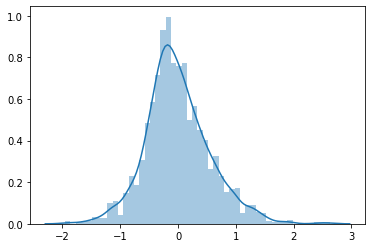

In [84]:
sns.distplot((y_test-y_pred),bins=50)

In [86]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.4256788993790108
Root Mean Squared Error: 0.5578433473146853
R2 Score: 0.6800475541161142


# STEP 10

**TRYING DIFFERENT ALGORITHMS**

Build Models
which algorithms would be good on this problem or what configurations to use, is not known. So, an idea is taken from the plots that some of the classes are partially linearly separable in some dimensions.

Evaluating 6 different algorithms:

    Logistic Regression (LR)
    Linear Discriminant Analysis (LDA)
    K-Nearest Neighbors (KNN).
    Classification and Regression Trees (CART).
    Gaussian Naive Bayes (NB).
    Support Vector Machines (SVM).

Algorithms chosen are a mixture of linear (LR and LDA) and nonlinear (KNN, CART, NB and SVM) algorithms. Random number seed are reset before each run to ensure that the evaluation of each algorithm is performed using exactly the same data splits. It ensures the results are directly comparable.

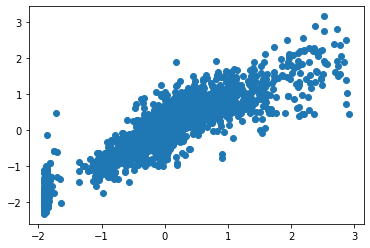

In [87]:
 from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)
# Predicting a new result with Polynomial Regression
y_pred=lin_reg_2.predict(poly_reg.fit_transform(X_test))
plt.scatter(y_test,y_pred)


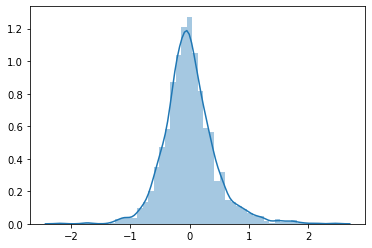

In [88]:
sns.distplot((y_test-y_pred),bins=50)

In [89]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.31573061752350967
Root Mean Squared Error: 0.4351456478672659
R2 Score: 0.8053160242314694


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


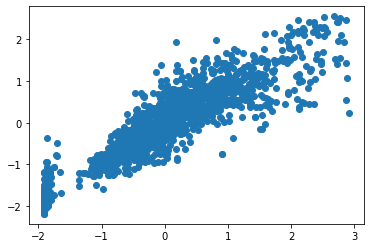

In [91]:
# Fitting SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
plt.scatter(y_test,y_pred)

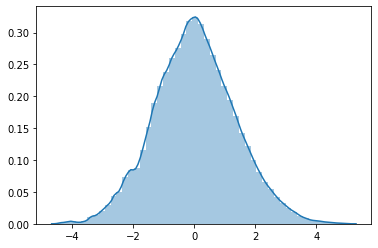

In [92]:
sns.distplot((y_test-y_pred),bins=50)

In [93]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.29633619416546725
Root Mean Squared Error: 0.42527355451237575
R2 Score: 0.814049362176249


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


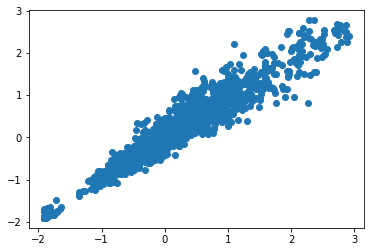

In [94]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
plt.scatter(y_test,y_pred)

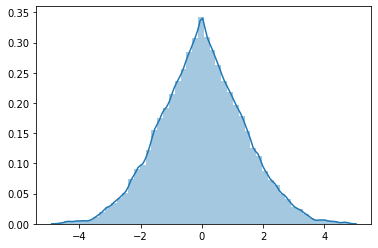

In [95]:
sns.distplot((y_test-y_pred),bins=50)

In [96]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.17769704010247667
Root Mean Squared Error: 0.24743996001244517
R2 Score: 0.9370492959370332


**BY CHECKING DIFFERENT ALGORITHIMS**

RandomForestRegressor( **HIGHEST ACCURACY** )

Mean Absolute Error: 0.17769704010247667
Root Mean Squared Error: 0.24743996001244517
R2 Score: 0.9370492959370332

SVR

Mean Absolute Error: 0.29633619416546725
Root Mean Squared Error: 0.42527355451237575
R2 Score: 0.814049362176249

PolynomialFeatures

Mean Absolute Error: 0.31573061752350967
Root Mean Squared Error: 0.4351456478672659
R2 Score: 0.8053160242314694



# Conclusion

Exploratory Data Analysis is an important part of the data scientist as it helps to build a familiarity with the data we have available. Using EDA will help us in arriving at the solution much faster as we would have already identified any patterns which we would like to exploit when we enter the data modelling phase.